In [10]:
import scipp as sc
import plopp as pp
from ess import amor, reflectometry
import ess

In [1]:
from scipp import *

In [2]:
from orsopy import fileio
from ess.amor.orso import make_orso

In [3]:
pp.patch_scipp()

sample_rotation = sc.scalar(0.7989, unit='deg')
sample_beamline = amor.make_beamline(sample_rotation=sample_rotation)
reference_rotation = sc.scalar(0.8389, unit='deg')
reference_beamline = amor.make_beamline(sample_rotation=reference_rotation)

owner = fileio.base.Person('Jochen Stahn', 'Paul Scherrer Institut', 'jochen.stahn@psi.ch')
sample = fileio.data_source.Sample('Ni/Ti Multilayer', 'gas/solid', 'air | (Ni | Ti) * 5 | Si')
creator = fileio.base.Person('Andrew R. McCluskey', 'European Spallation Source', 'andrew.mccluskey@ess.eu')

orso = make_orso(owner=owner,
                 sample=sample,
                 creator=creator,
                 reduction_script='https://github.com/scipp/ess/blob/main/docs/instruments/amor/amor_reduction.ipynb')

In [4]:
sample = amor.load(amor.data.get_path("sample.nxs"),
                   orso=orso,
                   beamline=sample_beamline)
sample

<scipp.DataArray>
Dimensions: Sizes[detector_id:9216, tof:1, ]
Coordinates:
  beam_size                 float64             [mm]  ()  [2]
  detector_id                 int32        <no unit>  (detector_id)  [1, 2, ..., 9215, 9216]
  detector_spatial_resolution  float64              [m]  ()  [0.0025]
  gravity                   vector3          [m/s^2]  ()  [(0, -9.80665, 0)]
  position                  vector3              [m]  (detector_id)  [(-0.064, 0.0945976, 4.12644), (-0.059871, 0.0945976, 4.12644), ..., (0.059871, 0, 4), (0.064, 0, 4)]
  sample_position           vector3              [m]  ()  [(0, 0, 0)]
  sample_rotation           float64            [deg]  ()  [0.7989]
  sample_size               float64             [mm]  ()  [10]
  source_chopper_1          Dataset        <no unit>  ()  [<scipp.Dataset>
Dimensions: Sizes[]
Data:
  frequency                 float64             [Hz]  ()  [6.66667]
  phase                     float64            [deg]  ()  [-8]
  position                  vector3              [m]  ()  [(0, 0, -15.5)]

]
  source_chopper_2          Dataset        <no unit>  ()  [<scipp.Dataset>
Dimensions: Sizes[]
Data:
  frequency                 float64             [Hz]  ()  [6.66667]
  phase                     float64            [deg]  ()  [-8]
  position                  vector3              [m]  ()  [(0, 0, -14.5)]

]
  source_position           vector3              [m]  ()  [(0, 0, 30)]
  tof                       float64            [µs]  (tof [bin-edge])  [0, 75000]
Data:
                          DataArrayView        <no unit>  (detector_id, tof)  binned data: dim='event', content=DataArray(
          dims=(event: 261790),
          data=float32[counts],
          coords={'tof':float64[µs], 'pulse_time':datetime64[ns]})
Attributes:
  base_position             vector3              [m]  (detector_id)  [(-0.064, 0.0945976, 4.12644), (-0.059871, 0.0945976, 4.12644), ..., (0.059871, 0, 4), (0.064, 0, 4)]
  com                     DataArray        <no unit>  ()  DataArray(dims=(time: 1), dtype=float64)
  coz                     DataArray        <no unit>  ()  DataArray(dims=(time: 1), dtype=float64)
  experiment_title           string        <no unit>  ()  ["commissioning"]
  horizontal              DataArray        <no unit>  ()  DataArray(dims=(time: 0), dtype=float64)
  instrument_name            string        <no unit>  ()  ["AMOR"]
  orso                     PyObject        <no unit>  ()  [Orso(
     data_source=DataSource(
                            owner=Person(name='Jochen Stahn', affiliation='Paul Scherrer Institut', contact='jochen.stahn@psi.ch'),
                            experiment=Experiment(title='commissioning', instrument='AMOR', start_date='2020-11-25', probe='neutrons', facility='Paul Scherrer Institut'),
                            sample=Sample(name='Ni/Ti Multilayer', category='gas/solid', composition='air | (Ni | Ti) * 5 | Si'),
                            measurement=Measurement(
                                                    instrument_settings=InstrumentSettings(
                                                                                           incident_angle=Value(None),
                                                                                           wavelength=Value(None),
                                                                                           ),
                                                    data_files=['/home/sunyoung/.cache/ess/amor/1/sample.nxs'],
                                                    scheme='angle- and energy-dispersive',
                                                    ),
                            ),
     reduction=Reduction(
                         software=Software(name='scipp-ess', version='0.0.0-unknown', platform='Linux-5.15.0-58-generic-x86_64-with-glibc2.35'),
                         creator=Person(name='Andrew R. McCluskey', affiliation='European Spallation Source', contact='andrew.mccluskey@e

In [5]:
reference = amor.load(amor.data.get_path("reference.nxs"),
                      orso=orso,
                      beamline=reference_beamline)
reference

<scipp.DataArray>
Dimensions: Sizes[detector_id:9216, tof:1, ]
Coordinates:
  beam_size                 float64             [mm]  ()  [2]
  detector_id                 int32        <no unit>  (detector_id)  [1, 2, ..., 9215, 9216]
  detector_spatial_resolution  float64              [m]  ()  [0.0025]
  gravity                   vector3          [m/s^2]  ()  [(0, -9.80665, 0)]
  position                  vector3              [m]  (detector_id)  [(-0.064, 0.0945976, 4.12644), (-0.059871, 0.0945976, 4.12644), ..., (0.059871, 0, 4), (0.064, 0, 4)]
  sample_position           vector3              [m]  ()  [(0, 0, 0)]
  sample_rotation           float64            [deg]  ()  [0.8389]
  sample_size               float64             [mm]  ()  [10]
  source_chopper_1          Dataset        <no unit>  ()  [<scipp.Dataset>
Dimensions: Sizes[]
Data:
  frequency                 float64             [Hz]  ()  [6.66667]
  phase                     float64            [deg]  ()  [-8]
  position                  vector3              [m]  ()  [(0, 0, -15.5)]

]
  source_chopper_2          Dataset        <no unit>  ()  [<scipp.Dataset>
Dimensions: Sizes[]
Data:
  frequency                 float64             [Hz]  ()  [6.66667]
  phase                     float64            [deg]  ()  [-8]
  position                  vector3              [m]  ()  [(0, 0, -14.5)]

]
  source_position           vector3              [m]  ()  [(0, 0, 30)]
  tof                       float64            [µs]  (tof [bin-edge])  [0, 75000]
Data:
                          DataArrayView        <no unit>  (detector_id, tof)  binned data: dim='event', content=DataArray(
          dims=(event: 4765673),
          data=float32[counts],
          coords={'tof':float64[µs], 'pulse_time':datetime64[ns]})
Attributes:
  base_position             vector3              [m]  (detector_id)  [(-0.064, 0.0945976, 4.12644), (-0.059871, 0.0945976, 4.12644), ..., (0.059871, 0, 4), (0.064, 0, 4)]
  com                     DataArray        <no unit>  ()  DataArray(dims=(time: 1), dtype=float64)
  coz                     DataArray        <no unit>  ()  DataArray(dims=(time: 1), dtype=float64)
  experiment_title           string        <no unit>  ()  ["commissioning"]
  horizontal              DataArray        <no unit>  ()  DataArray(dims=(time: 0), dtype=float64)
  instrument_name            string        <no unit>  ()  ["AMOR"]
  orso                     PyObject        <no unit>  ()  [Orso(
     data_source=DataSource(
                            owner=Person(name='Jochen Stahn', affiliation='Paul Scherrer Institut', contact='jochen.stahn@psi.ch'),
                            experiment=Experiment(title='commissioning', instrument='AMOR', start_date='2020-11-25', probe='neutrons', facility='Paul Scherrer Institut'),
                            sample=Sample(name='Ni/Ti Multilayer', category='gas/solid', composition='air | (Ni | Ti) * 5 | Si'),
                            measurement=Measurement(
                                                    instrument_settings=InstrumentSettings(
                                                                                           incident_angle=Value(None),
                                                                                           wavelength=Value(None),
                                                                                           ),
                                                    data_files=['/home/sunyoung/.cache/ess/amor/1/reference.nxs'],
                                                    scheme='angle- and energy-dispersive',
                                                    ),
                            ),
     reduction=Reduction(
                         software=Software(name='scipp-ess', version='0.0.0-unknown', platform='Linux-5.15.0-58-generic-x86_64-with-glibc2.35'),
                         creator=Person(name='Andrew R. McCluskey', affiliation='European Spallation Source', contact='andrew.mcclusk

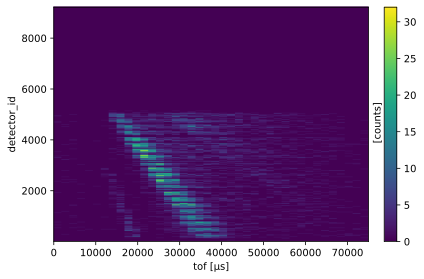

In [6]:
def pixel_position_correction(data: sc.DataArray):
    return data.coords['position'].fields.z * sc.tan(2.0 *
                                                     data.coords['sample_rotation'] -
                                                     (0.955 * sc.units.deg))

sample.coords['position'].fields.y += pixel_position_correction(sample)
reference.coords['position'].fields.y += pixel_position_correction(reference)
sample.attrs['orso'].value.data_source.measurement.comment = 'Pixel positions corrected'
reference.attrs['orso'].value.data_source.measurement.comment = 'Pixel positions corrected'
sample.hist(tof=40).plot()

# Workflow

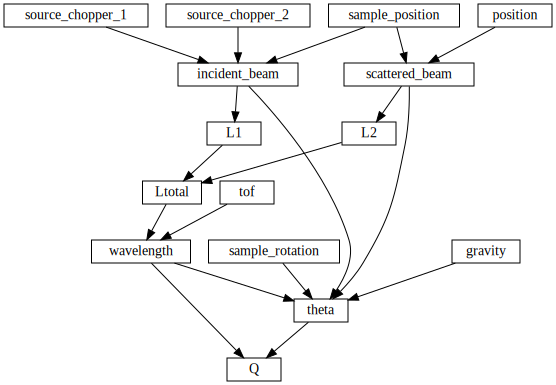

In [7]:
graph = amor.conversions.specular_reflection()
sc.show_graph(graph, simplified=True)

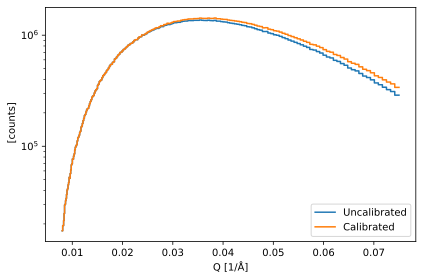

In [8]:
wavelength_edges = sc.array(dims=['wavelength'],
                            values=[2.4, 16.0],
                            unit='angstrom')
sample_wav = reflectometry.conversions.tof_to_wavelength(sample, wavelength_edges, graph=graph)
# sample_wav.bins.concat('detector_id').hist(wavelength=200).plot()
reference_wav = reflectometry.conversions.tof_to_wavelength(
    reference, wavelength_edges, graph=graph)
sample_theta = reflectometry.conversions.wavelength_to_theta(
    sample_wav, graph=graph)
sample_theta = reflectometry.corrections.footprint_correction(sample_theta)
reference_theta = reflectometry.conversions.wavelength_to_theta(
    reference_wav, graph=graph)
reference_theta = reflectometry.corrections.footprint_correction(reference_theta)
sample_theta.coords['wavelength_resolution'] = amor.resolution.wavelength_resolution(
    chopper_1_position=sample.coords['source_chopper_1'].value['position'],
    chopper_2_position=sample.coords['source_chopper_2'].value['position'],
    pixel_position=sample.coords['position'])
sample_theta.bins.coords['angular_resolution'] = amor.resolution.angular_resolution(
    pixel_position=sample.coords['position'],
    theta=sample_theta.bins.coords['theta'],
    detector_spatial_resolution=sample_theta.coords['detector_spatial_resolution'])
sample_theta.coords['sample_size_resolution'] = amor.resolution.sample_size_resolution(
    pixel_position=sample.coords['position'], sample_size=sample.coords['sample_size'])
q_edges = sc.geomspace(dim='Q', start=0.008, stop=0.075, num=200, unit='1/angstrom')

sample_q = reflectometry.conversions.theta_to_q(
    sample_theta, q_edges=q_edges, graph=graph)
reference_q = reflectometry.conversions.theta_to_q(
    reference_theta, q_edges=q_edges, graph=graph)

reference_q_summed = reflectometry.conversions.sum_bins(reference_q)
reference_q_summed_cal = amor.calibrations.supermirror_calibration(
    reference_q_summed)
pp.plot({'Uncalibrated': reference_q_summed.sum('detector_id'),
         'Calibrated': reference_q_summed_cal.sum('detector_id')},
        norm='log')


In [9]:
sample_q_summed = reflectometry.conversions.sum_bins(sample_q)

sample_norm = reflectometry.corrections.normalize_by_counts(sample_q_summed)
reference_norm = reflectometry.corrections.normalize_by_counts(reference_q_summed_cal)

normalized = amor.normalize.normalize_by_supermirror(sample_norm, reference_norm)

normalized.plot(norm='log')
normalized.mean('detector_id').plot(norm='log')

normalized.coords['sigma_Q'] = amor.resolution.sigma_Q(
    angular_resolution=normalized.coords['angular_resolution'],
    wavelength_resolution=normalized.coords['wavelength_resolution'],
    sample_size_resolution=normalized.coords['sample_size_resolution'],
    q_bins=normalized.coords['Q'])
sample_theta = sample.transform_coords(["theta", "wavelength"], graph=graph)
sample_theta = sample_theta.bins.concat('detector_id')
nbins = 165
theta_edges = sc.linspace(dim='theta', start=0.0, stop=1.2, num=nbins, unit='deg')
wavelength_edges = sc.linspace(dim='wavelength', start=0, stop=15.0,
                               num=nbins, unit='angstrom')
binned = sample_theta.bin(theta=theta_edges.to(unit='rad'), wavelength=wavelength_edges)
binned

/home/sunyoung/anaconda3/envs/dashboard/lib/python3.9/site-packages/plopp/functions/common.py:136: UserWarning: The input contains a coordinate with unsorted values (wavelength_resolution). The results may be unpredictable. Coordinates can be sorted using `scipp.sort(data, dim="to_be_sorted", order="ascending")`.
  warnings.warn(
/home/sunyoung/anaconda3/envs/dashboard/lib/python3.9/site-packages/plopp/functions/common.py:136: UserWarning: The input contains a coordinate with unsorted values (sample_size_resolution). The results may be unpredictable. Coordinates can be sorted using `scipp.sort(data, dim="to_be_sorted", order="ascending")`.
  warnings.warn(
/home/sunyoung/anaconda3/envs/dashboard/lib/python3.9/site-packages/plopp/functions/common.py:136: UserWarning: The input contains a coordinate with unsorted values (angular_resolution). The results may be unpredictable. Coordinates can be sorted using `scipp.sort(data, dim="to_be_sorted", order="ascending")`.
  warnings.warn(


<scipp.DataArray>
Dimensions: Sizes[theta:164, wavelength:164, ]
Coordinates:
  beam_size                 float64             [mm]  ()  [2]
  detector_spatial_resolution  float64              [m]  ()  [0.0025]
  sample_size               float64             [mm]  ()  [10]
  source_position           vector3              [m]  ()  [(0, 0, 30)]
  theta                     float64            [rad]  (theta [bin-edge])  [0, 0.000127707, ..., 0.0208162, 0.020944]
  wavelength                float64             [Å]  (wavelength [bin-edge])  [0, 0.0914634, ..., 14.9085, 15]
Data:
                          DataArrayView        <no unit>  (theta, wavelength)  binned data: dim='event', content=DataArray(
          dims=(event: 261296),
          data=float32[counts],
          coords={'pulse_time':datetime64[ns], 'wavelength':float64[Å],
                  'theta':float64[rad]},
          attrs={'tof':float64[µs]})
Attributes:
  L1                        float64              [m]  ()  [15]
  com                     DataArray        <no unit>  ()  DataArray(dims=(time: 1), dtype=float64)
  coz                     DataArray        <no unit>  ()  DataArray(dims=(time: 1), dtype=float64)
  experiment_title           string        <no unit>  ()  ["commissioning"]
  gravity                   vector3          [m/s^2]  ()  [(0, -9.80665, 0)]
  horizontal              DataArray        <no unit>  ()  DataArray(dims=(time: 0), dtype=float64)
  incident_beam             vector3              [m]  ()  [(0, 0, 15)]
  instrument_name            string        <no unit>  ()  ["AMOR"]
  orso                     PyObject        <no unit>  ()  [Orso(
     data_source=DataSource(
                            owner=Person(name='Jochen Stahn', affiliation='Paul Scherrer Institut', contact='jochen.stahn@psi.ch'),
                            experiment=Experiment(title='commissioning', instrument='AMOR', start_date='2020-11-25', probe='neutrons', facility='Paul Scherrer Institut'),
                            sample=Sample(name='Ni/Ti Multilayer', category='gas/solid', composition='air | (Ni | Ti) * 5 | Si'),
                            measurement=Measurement(
                                                    instrument_settings=InstrumentSettings(
                                                                                           incident_angle=Value(None),
                                                                                           wavelength=Value(None),
                                                                                           ),
                                                    data_files=['/home/sunyoung/.cache/ess/amor/1/sample.nxs'],
                                                    scheme='angle- and energy-dispersive',
                                                    comment='Pixel positions corrected',
                                                    ),
                            ),
     reduction=Reduction(
                         software=Software(name='scipp-ess', version='0.0.0-unknown', platform='Linux-5.15.0-58-generic-x86_64-with-glibc2.35'),
                         creator=Person(name='Andrew R. McCluskey', affiliation='European Spallation Source', contact='andrew.mccluskey@ess.eu'),
                         corrections=['chopper ToF correction'],
                         computer='sunyoung-ThinkStation-P520',
                         script='https://github.com/scipp/ess/blob/main/docs/instruments/amor/amor_reduction.ipynb',
                         ),
     columns=[Column(name='Qz', unit='1/angstrom', dimension='wavevector transfer'), Column(name='R', dimension='reflectivity'), Column(name='sR', dimension='standard deivation of reflectivity'), Column(name='sQz', unit='1/angstrom', dimension='standard deviation of wavevector transfer resolution')],
     )]
  sample                   PyObject        <no unit>  ()  [DataGroup(sizes={}, keys=[])]
  sample_position           vector3              [m] 